In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('data.csv')
data.head(5)

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [3]:
X = data[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos']]
print(X.shape)
X.head(5)

(863, 13)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0


In [4]:
Y = data['result']
print(Y.shape)
Y.head()

(863,)


0    1
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [5]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .1, random_state = 3, shuffle = True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(776, 13)
(87, 13)
(776,)
(87,)


In [6]:
# xTest, xVal, yTest, yVal = train_test_split(xTest_val, yTest_val, test_size = .5, random_state = 1, shuffle=True)
# print(xTest.shape)
# print(xVal.shape)
# print(yTest.shape)
# print(yVal.shape)

In [7]:
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain=scaler.transform(xTrain)
xTest=scaler.transform(xTest)
# xVal=scaler.transform(xVal)

In [8]:
k_range = list(i for i in range(1, 20))
#print(k_range)
clf = BernoulliNB(alpha = 1, binarize=1, fit_prior=True)
grid_values = {'alpha':k_range , 'binarize':k_range, 'fit_prior':[True, False]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,  cv= 10 , n_jobs= -1,scoring = 'accuracy')
grid_clf_acc.fit(xTrain, yTrain)

GridSearchCV(cv=10, estimator=BernoulliNB(alpha=1, binarize=1), n_jobs=-1,
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19],
                         'binarize': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                      14, 15, 16, 17, 18, 19],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [9]:
print(grid_clf_acc.best_score_)
print(grid_clf_acc.best_params_)
print(grid_clf_acc.best_estimator_)

0.9085081585081584
{'alpha': 5, 'binarize': 1, 'fit_prior': True}
BernoulliNB(alpha=5, binarize=1)


In [10]:
model = BernoulliNB(alpha = 5, binarize=1, fit_prior = True)
model.fit(xTrain,yTrain)

BernoulliNB(alpha=5, binarize=1)

In [11]:
#Calculating Details
print('GaussianNB Model Train Score is : ' , model.score(xTrain, yTrain))
# print('GaussianNB Model Validation Score is : ' , model.score(xVal, yVal))

GaussianNB Model Train Score is :  0.9097938144329897


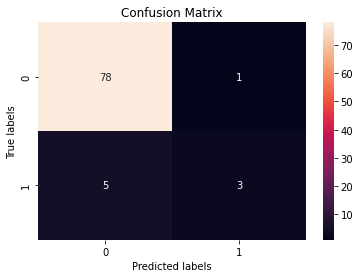

In [12]:
#Calculating Prediction
yPred = model.predict(xTest)
#print('Predicted Value for LogisticRegressionModel is : ' , yPred[:10])

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [13]:
#Calculating classification Report :  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.75      0.38      0.50         8

    accuracy                           0.93        87
   macro avg       0.84      0.68      0.73        87
weighted avg       0.92      0.93      0.92        87



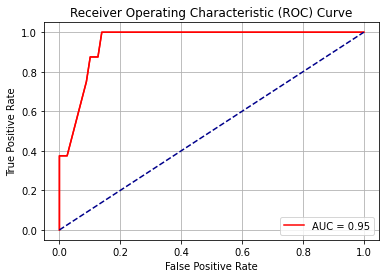

In [14]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(yTest, model.predict_proba(xTest)[:,1])

roc_auc = roc_auc_score(yTest, model.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()